# Задача 1

Для выборки N=100, представленной вариационным рядом

 | xi |-1 | 0 | 1 | 2 | 3 | 4 | 5 |
 |----|---|---|---|---|---|---|---|
 | ni | 4 | 6 | 12| 18| 31| 23| 6 |

- Построить полигон относительных частот и гистограмму накопленных частот.

- Найти выборочное среднее и выборочное среднее квадратичное отклонение.

- Определить доверительный интервал с доверительной вероятностью \alpha=0.95 для оценки математического ожидания генеральной совокупности в предположении, что среднее квадратичное уклонение генеральной совокупности равно исправленному выборочному среднему s.

- Проверить гипотезу о нормальности закона распределения генеральной совокупности, используя критерий Пирсона с уровнем значимости a=0,05.

- Для вычислений можно использовать язык программирования.

## Решение

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

xi = np.array([-1, 0, 1, 2, 3, 4, 5])
ni = np.array([4, 6, 12, 18, 31, 23, 6])

# относительные частоты
wi = ni / ni.sum()

df = pd.DataFrame({
    "xi": xi,
    "ni": ni,
    "wi": wi
})

print(df)

   xi  ni    wi
0  -1   4  0.04
1   0   6  0.06
2   1  12  0.12
3   2  18  0.18
4   3  31  0.31
5   4  23  0.23
6   5   6  0.06


### Полигон относительных частот

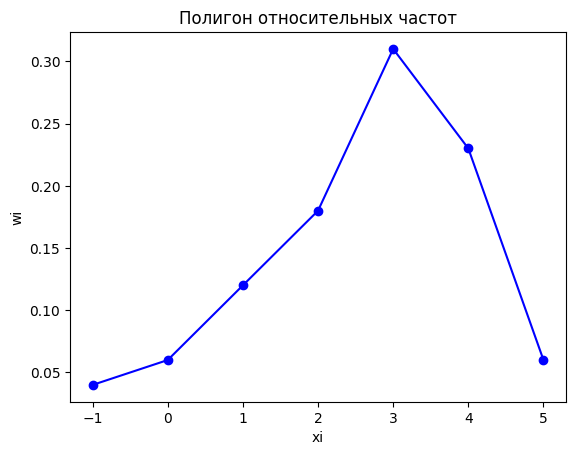

In [2]:
plt.title("Полигон относительных частот")
plt.xlabel("xi")
plt.ylabel("wi")
plt.plot(df.xi, df.wi, 'o-b')
# plt.bar(df.xi, df.wi)
plt.show()

### Гистограмма накопленных частот

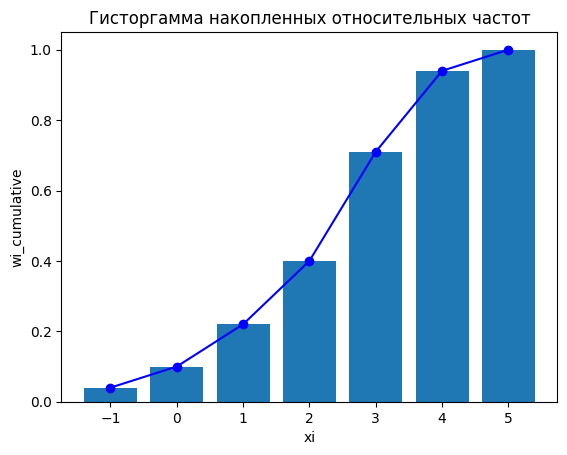

In [3]:
# для относительных частот
df["wi_cumulative"] = df.wi.cumsum() 
plt.title("Гисторгамма накопленных относительных частот")
plt.xlabel("xi")
plt.ylabel("wi_cumulative")
plt.bar(df.xi, df["wi_cumulative"])
plt.plot(df.xi, df["wi_cumulative"], 'o-b')
plt.show()

### Выборочное среднее и выборочное среднее квадратичное отклонение

In [4]:
n = df.ni.sum()
x_mean = (df.xi * df.ni).sum() / n
x_var = ((df.xi - x_mean) ** 2 * df.ni).sum() / n

print(f"Выборочное среднее   = {x_mean}")
print(f"Выборочная дисперсия = {x_var}")

Выборочное среднее   = 2.59
Выборочная дисперсия = 2.1419


In [5]:
x_std2 =  x_var * (n / (n-1))
x_std = math.sqrt(x_std2)
print(f"Несмещенная выборочная дисперсия = {x_std2:7.4f}")
print(f"Несмещенное выборочное среднее квардатичное отклонение = {x_std:7.4f}")

Несмещенная выборочная дисперсия =  2.1635
Несмещенное выборочное среднее квардатичное отклонение =  1.4709


### Доверительный интервал

Определить доверительный интервал с доверительной вероятностью y=0.95 для оценки математического ожидания генеральной совокупности в предположении, что среднее квадратичное уклонение генеральной совокупности равно исправленному выборочному среднему s.


In [6]:
print(f"Объем выборки n = {n}")
print(f"Выборочное среднее x_mean = {x_mean}")
print(f"Среднее кв.откл.   x_std  = {x_std:7.4f}")

t_minus, t_plus = stats.norm.interval(confidence = 0.95)
print(f"t-параметры: ({t_minus:7.4f}; {t_plus:7.4f})")

delta_minus = x_mean + t_minus * x_std / math.sqrt(n)
delta_plus = x_mean + t_plus * x_std / math.sqrt(n)

print(f"Доверительный интервал: ({delta_minus:7.4f} < {x_mean} < {delta_plus:7.4f})")


Объем выборки n = 100
Выборочное среднее x_mean = 2.59
Среднее кв.откл.   x_std  =  1.4709
t-параметры: (-1.9600;  1.9600)
Доверительный интервал: ( 2.3017 < 2.59 <  2.8783)


### Проверка гипотезы о нормальности закона распределения 

Проверить гипотезу о нормальности закона распределения генеральной совокупности, используя критерий Пирсона с уровнем значимости ${\alpha}=0,05$.

Гипотеза H0: генеральная совокупность распределена по нормальному закону.

In [7]:
# Критерий Пирсона
'''
Для соблюдения условия n_i>=5, объединим первый и второй интервал и их частоты в выборке:
'''
xi = np.array([ 0,  1,  2,  3,  4, 5])
ni = np.array([10, 12, 18, 31, 23, 6])

df = pd.DataFrame({
    "xi": xi,
    "ni": ni,
})

n = df.ni.sum()
x_mean = (df.xi * df.ni).sum() / n
x_var = ((df.xi - x_mean) ** 2 * df.ni).sum() / n
x_std = math.sqrt(x_var)

print(f"Выборочное среднее   = {x_mean:7.4f}")
print(f"Выборочная дисперсия = {x_var:7.4f}")
print(f"Выборочное ст. откл.  = {x_std:7.4f}")

Выборочное среднее   =  2.6300
Выборочная дисперсия =  1.8931
Выборочное ст. откл.  =  1.3759


In [8]:
df["pi"] = stats.norm.pdf(df.xi, loc=x_mean, scale=x_std)
df["ni_norm"] = df.pi * n 
df["chi2"] = ((df.ni - df.ni_norm) ** 2) / df.ni_norm
print(df)

chi2_nab = df.chi2.sum()
print(f"Наблюдаемое значение хи-квадрат = {chi2_nab:7.4f}")

   xi  ni        pi    ni_norm      chi2
0   0  10  0.046658   4.665768  6.098465
1   1  12  0.143736  14.373571  0.391958
2   2  18  0.261094  26.109409  2.518729
3   3  31  0.279653  27.965348  0.329304
4   4  23  0.176618  17.661771  1.613467
5   5   6  0.065772   6.577171  0.050649
Наблюдаемое значение хи-квадрат = 11.0026


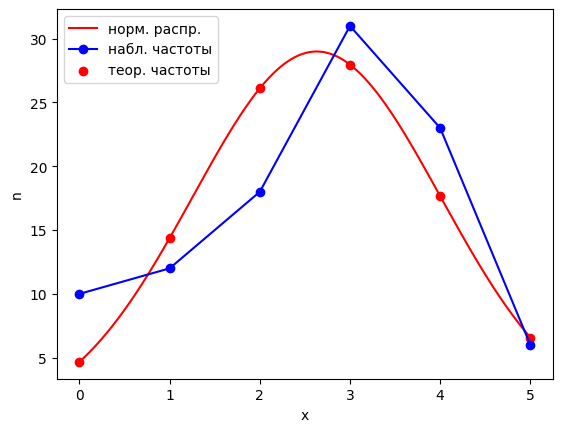

In [9]:
dh = pd.DataFrame({
    "xi": np.arange (0, 5, 0.01),
})
dh["pi"] = stats.norm.pdf(dh.xi, x_mean, x_std)

plt.plot (dh.xi, dh.pi * n, color='red', label = 'норм. распр.')
# plt.bar(df.xi, df.ni, color='blue', label = 'набл. расп.')
plt.plot(df.xi, df.ni, color='blue', marker='o', label = 'набл. частоты')
plt.scatter(df.xi, df.ni_norm, color='red', label = 'теор. частоты')
plt.xlabel("x")
plt.ylabel("n")

plt.legend()
plt.show()

In [10]:
# Критическое значение хи-квадрат

sg = 6 
k = sg - 3
alpha = 0.05
print(f"Число групп выборки sg={sg}")
print(f"Число степеней свободы k= sg - 3 = {k}")
print(f"Уровень значимости alpha = {alpha}")

chi2_teor = stats.chi2.isf(alpha, k, loc=0, scale=1)
print(f"Критическое значение хи-квардат для aplpha={alpha} и {k} степеней свободы: {chi2_teor:7.4f}")

print(f"Так как ({chi2_nab:7.4f} > {chi2_teor:7.4f}), то гипотезу H0 о нормальном распределении генеральной совокупности отвергаем.")

Число групп выборки sg=6
Число степеней свободы k= sg - 3 = 3
Уровень значимости alpha = 0.05
Критическое значение хи-квардат для aplpha=0.05 и 3 степеней свободы:  7.8147
Так как (11.0026 >  7.8147), то гипотезу H0 о нормальном распределении генеральной совокупности отвергаем.


# Задача 2

Имеются следующие данные по группе предприятий о выпуске продукции (X, тыс.шт.) и себестоимости одного изделия (Y, руб.)

| x | 2,0 | 3,5 | 4,0 | 4,5 | 5,5 | 6,0 | 7,5 |
|---|-----|-----|-----|-----|-----|-----|-----|
| y | 1,8 | 1,7 | 1,8 | 1,5 | 1,6 | 1,4 | 1,2 |


- Вычислить коэффициент корреляции на основе этих данных. 
- При уровне значимости 0,05 проверить нулевую гипотезу H0 равенстве нулю коэффициента корреляции в генеральной совокупности. 
- Построить уравнение линейной регрессионной зависимости и объяснить его смысл. 
- Спрогнозировать среднюю себестоимость одного изделия при выпуске 6,5 тыс. шт.

## Решение

In [11]:
xi = np.array([2.0, 3.5, 4.0, 4.5, 5.5, 6.0, 7.5])
yi = np.array([1.8, 1.7, 1.8, 1.5, 1.6, 1.4, 1.2])

df = pd.DataFrame({
    "xi": xi,
    "yi": yi,
})

print(df)

    xi   yi
0  2.0  1.8
1  3.5  1.7
2  4.0  1.8
3  4.5  1.5
4  5.5  1.6
5  6.0  1.4
6  7.5  1.2


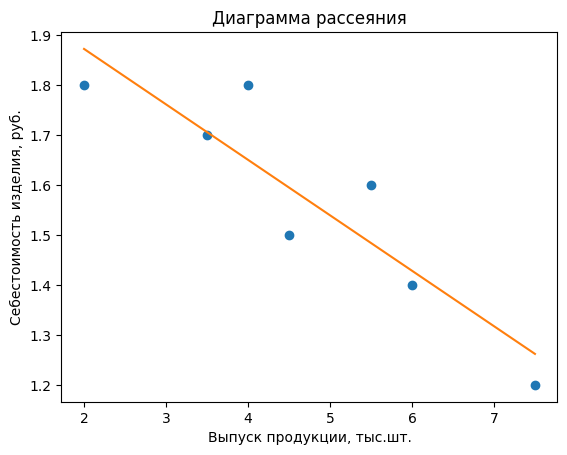

In [12]:
plt.title("Диаграмма рассеяния")
plt.xlabel("Выпуск продукции, тыс.шт.")
plt.ylabel("Себестоимость изделия, руб.")
plt.plot(df.xi, df.yi, 'o')
m, b0 = np.polyfit(df.xi, df.yi, 1)
plt.plot(df.xi, m*df.xi + b0) 
plt.show()

In [13]:
# Коэффициент корреляции

n = df.yi.count()

xy_mean = (df.xi * df.yi).sum() / n
x_mean = df.xi.mean()
y_mean = df.yi.mean()

x_var = ((df.xi - x_mean) ** 2).sum() / n 
x_std = math.sqrt(x_var)
y_var = ((df.yi - y_mean) ** 2).sum() / n
y_std = math.sqrt(y_var)

rxy = (xy_mean - x_mean * y_mean) / (x_std * y_std)

rxy_np = np.corrcoef(df.xi, df.yi)
assert(round(rxy,7) == round(rxy_np[0][1],7))

print(f"Коэффициент корреляции rxy = {rxy:7.4f}")

Коэффициент корреляции rxy = -0.9021


In [14]:
# Вычислим коэффициенты линейной регрессии y = ax + b

a = (rxy * y_std) / x_std
b = y_mean - a * x_mean

assert(round(a,7) == round(m, 7))
assert(round(b,7) == round(b0,7))

print(f"Уравнение регрессии: y = {a:7.4f} * x + {b:7.4f}")
print(f"C увеличением объема выпуска продукции на 1 тыс.шт. себестоимость уменьшается в среднем примерно на 11 копеек.")

Уравнение регрессии: y = -0.1110 * x +  2.0949
C увеличением объема выпуска продукции на 1 тыс.шт. себестоимость уменьшается в среднем примерно на 11 копеек.


In [15]:
z = 6.5
y_prog = a * z + b
print(f"При объеме выпуска {z:5.1f} тыс.шт. среднеожидаемое значение себестоимости составит {y_prog:5.2} руб.")

При объеме выпуска   6.5 тыс.шт. среднеожидаемое значение себестоимости составит   1.4 руб.


In [16]:
'''
Проверим значимость выборочного коэффициента корреляции r = -0.1110
Рассмотрим нулевую гипотезу H0: ro = 0 - генеральный линейный коэффициент корреляции равен нулю,
то есть себестоимость продукции не зависит от объема выпуска. 
'''

alpha = 0.05
k = n - 2 
t_ob = rxy * math.sqrt(k) / math.sqrt(1 - rxy ** 2)
print(f"Наблюдаемое значение t = {t_ob:7.4f}")

t_kr = stats.t.ppf(q = 1 - alpha / 2, df = k)
print(f"Область принятия гипотезы: {-t_kr:7.4f} < {t_ob:7.4f} < {t_kr:7.4f}")
print(f"Неравенство НЕ выполняется. Поэтому гипотезу H0 отвергаем.")
print(f"Выборочное значение rxy={rxy:7.4f} оказалось статистически значимым.")


Наблюдаемое значение t = -4.6756
Область принятия гипотезы: -2.5706 < -4.6756 <  2.5706
Неравенство НЕ выполняется. Поэтому гипотезу H0 отвергаем.
Выборочное значение rxy=-0.9021 оказалось статистически значимым.
